<a href="https://colab.research.google.com/github/spehl-max/LLM-Primacy-Bias/blob/main/LLM_Primacy_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Primacy Bias

Written by: Max Spehlmann\
Contact: mspehlm@ncsu.edu

Thank you for taking a look at my side project! Feel free to run the code, make changes, and experiment. If you expand on this project, please provide attribution.

# Env Set-Up

In [ ]:
# --- Data Packages ---
import pandas as pd
import matplotlib.pyplot as plt
import ast
from scipy.stats import fisher_exact

# --- Display utilities ---
from IPython.core.display import display, HTML


# --- Language Model API Call Dependencies ---
!pip -q install openai
import os
import openai
from openai import OpenAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
#provide your openai API key
os.environ["OPENAI_API_KEY"] = "sk-YOUR_KEY_HERE"

client = OpenAI()
input_model = "gpt-3.5-turbo"
input_temperature = 0.8  # this is the default temperature the chatGPT website uses
openai.api_key = os.environ.get("OPENAI_API_KEY")

# Redditors Text From The R/Writing *Weekly Critique And Self-Promotion* Thread


https://www.reddit.com/r/writing/comments/1cdwgts/weekly_critique_and_selfpromotion_thread_post/

*Accessed 5/2/2024*


In [ ]:
#Written by Connect-News2338

text_1 = """
The Padavapoan royal family might be the only royal family that loves horseback riding as much as the British royals. Although not as committed to the sport as he once was in his 20s, Prince Joseph is still a keen equestrian at the age of 39, and is set to compete in the 1974 Belmont Stakes. As his age and royal duties increase, his ability to compete in the activity that gave him an identity outside of being an obscure prince diminishes. On June 8, the night before the big event, Joseph and his wife, Princess Theresa, are in the middle of their nighttime routine. Joseph brushes his teeth and is ready to go to bed. But he looks at Theresa, who is seated at the nightstand, taking off her makeup with her back to him, and he hesitates. He takes this opportunity to share something that he’s been thinking about for some time. “After the Stakes, I’ll retire from horseback riding.” Theresa at first, smiles with relief, but remembers her husband’s love for the sport, and frowns with concern. “Are you sure? Horseback is what makes you the happiest.” Although Joseph smiles knowing that Theresa is relieved, he gets gloomy while explaining his decision. “It did make me happy. When I wanted a life beyond the confines of royalty. When I didn’t have a wife and two daughters to keep me grounded. Now everytime I’m on the horse I think about you and Margaret and Louise. And how happier we'd be if I wasn’t preoccupied with the racing. It’s time.” Theresa stands and grasps Joseph's hands. “Thank you.” They get into bed and Joseph turns off the light.
"""

#Written by ReplacementSalt2432

text_2 = """
It’s funny how memories carve themselves into your soul—the jagged edges of pain etched deeper than any laughter or sunshine. I was 7 when my parents split, and the world split with them. The house became a battleground, and I was the collateral damage. I remember that rainy afternoon, the one where Dad packed his bags, and Mom’s tears blurred the edges of reality. They whispered harsh words, flung accusations like knives. Silence settled in our house like dust. The laughter faded, replaced by the hollow echo of empty rooms. I’d tiptoe past their closed bedroom door, imagining them as strangers. Two people who once loved each other but now couldn’t stand the sight of their own reflections.  They blamed each other, and I blamed myself. Maybe if I’d been a better kid, they’d have stayed. Maybe if I’d drawn happier pictures or aced my math tests, they’d have remembered why they fell in love. But love, it seemed, was a fragile thing, shattered by harsh words and slammed doors. Dad said he’s going to a different country to make money, create a better future …things like that. Somehow, I already knew things wouldn’t never be the same.
"""

#Written by gimme-da-zoppity

text_3 = """
Running as fast as he could, Blake tried to catch the bus as it was speeding away. "Can't be late on my first day," he mumbled as he tried everything in his power to catch the rapidly drifting vehicle. It felt like even the bus driver pitied him when he saw, from the rearview mirror, a man in his early twenties, wearing a suit that barely fit him, trying his hardest to catch up because he stopped right after a few seconds of contemplation.

When inside, Blake gazed around to find a place where he can sit and maybe tidy himself up a bit before his big day. Towards the back of the bus, he could see a seat empty near a lady who looked to be in her fifties. As soon as he sat down, he made sure that he had everything he needed for his first day at work in his backpack. When the ticket collector eventually came around, Blake handed him a note and mumbled,

"One ticket to the Imperial House”.

The ticket collector took the note and asked Blake, while handing him the ticket,

“You seem new here”.

“You guessed it right. This is my first week in the capital, work takes you places, I guess.”

The ticket collector nodded and asked, “So I’m guessing you’re starting at the Imperial House, that looks like a fancy job. What’s your profile, My Liege!” chuckling as he makes that remark.

Cracking a forced smile, the young man answered, "Yeah, yeah, it’s the position of the Supreme Leader’s Secretary.”.

This statement garnered quick attention from everyone in the vicinity. People turned around and looked back at the young, shoddily dressed lad who looked like he was starting as a maintenance manager or something.
"""



# Prompt Engineering Section

### Create Function to Chain The Prompts Together

In [ ]:
def summarize_expand_compare_text(original_text, client, comparer_order="original_first"):

    summarize_prompt = f"""
    please summarize the following text. Include as much of the key details as possible

    {original_text}

    Output only the text for the summary below.
    """

    summarizer_response = client.chat.completions.create(
        messages=[{"role": "user", "content": summarize_prompt}],
        model = input_model,
        temperature = input_temperature
    ).choices[0].message.content

    expander_prompt = f"""
    You are an excellent novelist. Your goal is to use the summary below to draft a scene that will include all the key elements from the summary.

    You write in such a way as to maximize the following parameters,

    a) the human-sounding voice of the piece.
    b) the chance for commercial success of the piece.

    {summarizer_response}

    Output your scene below.

    """
    synthetic_response = client.chat.completions.create(
        messages=[{"role": "user", "content": expander_prompt}],
        model = input_model,
        temperature = input_temperature
    ).choices[0].message.content

    if comparer_order == "original_first":

      comparer_prompt = f"""
      You are an experienced editor comparing two pieces of writing.

      You are interested in determing the following,

      Which piece, 1 or 2,

      a) is more likely to be written by a human?
      b) has a higher chance of commercial success?

      Here are the two pieces,

      Piece 1,

      {synthetic_response}

      Piece 2,

      {original_text}

      Think carefully. Reread the passages, and take your time.

      Write a brief paragraph explaining your assessment, followed by a line break.
      Then, indicate the number of the piece you chose for each question by typing 'x,x', where `x` is the number, `1` or `2`, that you selected for that question.

      So a sample response would be:

      [Your explanation]
      [Line Break]
      [x,x]

      """

    elif comparer_order == "synthetic_first":

      comparer_prompt = f"""
      You are an experienced editor comparing two pieces of writing.

      You are interested in determing the following,

      Which piece, 1 or 2,

      a) is more likely to be written by a human?
      b) has a higher chance of commercial success?

      Here are the two pieces,

      Piece 1,

      {synthetic_response}

      Piece 2,

      {original_text}

      Think carefully. Reread the passages, and take your time.

      Write a brief paragraph explaining your assessment, followed by a line break.
      Then, indicate the number of the piece you chose for each question by typing 'x,x', where `x` is the number, `1` or `2`, that you selected for that question.

      So a sample response would be:

      [Your explanation]
      [Line Break]
      [x,x]

      """

    comparer_response = client.chat.completions.create(
        messages=[{"role": "user", "content": comparer_prompt}],
        model = input_model,
        temperature = input_temperature
    ).choices[0].message.content

    return {
        "Summarized Text": summarizer_response,
        "Synthetic Text": synthetic_response,
        "Comparer Text": comparer_response
    }

## Try With Original Text First

In [ ]:
results = summarize_expand_compare_text(text_1, client, comparer_order="original_first")

print("Summarized Text:\n")
print(results['Summarized Text'])
print("\nSynthetic Text:\n")
print(results['Synthetic Text'])
print("\nComparer Text:\n")
print(results['Comparer Text'])

Summarized Text:

Prince Joseph of the Padavapoan royal family, known for his love of horseback riding, decides to retire from the sport after competing in the 1974 Belmont Stakes. His decision is motivated by his growing royal duties and his desire to focus on his wife and daughters. Princess Theresa supports his decision, despite knowing how much he loves horseback riding.

Synthetic Text:

As the sun began to set over the royal stables, Prince Joseph stood in front of his favorite horse, Apollo, a mix of emotions swirling in his heart. The vibrant colors of the sky reflected in Apollo's glossy coat, creating a surreal moment of beauty and tranquility.

"Are you sure about this, my love?" Princess Theresa asked softly, her hand reaching out to touch his arm.

Prince Joseph turned to look at her, seeing the worry and love shining in her eyes. "I am, Theresa. I have to put my duties to our kingdom first. It's time for me to retire from horseback riding."

Princess Theresa nodded, a sma

## Try With Synthetic Text First

In [ ]:
results = summarize_expand_compare_text(text_1, client, comparer_order="synthetic_first")

print("Summarized Text:\n")
print(results['Summarized Text'])
print("\nSynthetic Text:\n")
print(results['Synthetic Text'])
print("\nComparer Text:\n")
print(results['Comparer Text'])

Summarized Text:

Prince Joseph of the Padavapoan royal family is a keen equestrian set to compete in the 1974 Belmont Stakes. However, he decides to retire from horseback riding after the event, feeling that his family is what truly makes him happy. His wife, Princess Theresa, supports his decision.

Synthetic Text:

As the sun began to set on the grounds of Belmont Park, Prince Joseph of Padavapoan sat atop his prized stallion, Thunderbolt, preparing for his final race. The crowd buzzed with excitement, eager to see the royal equestrian in action.

But as the starting gates opened and Thunderbolt thundered down the track, something inside Prince Joseph shifted. He no longer felt the same thrill he once did, the same rush of adrenaline that had driven him to compete in races all around the world.

As he crossed the finish line in a respectable third place, Prince Joseph knew that this would be his last race. He dismounted from Thunderbolt, a bittersweet smile on his face as he stroked

#Run Experiment

In [ ]:
def process_excerpts(excerpts):
    data = []
    for i, excerpt in enumerate(excerpts):
        for j in range(10):  # Run 5 times with original first, then 5 times with synthetic first
            comparer_order = "original_first" if j < 5 else "synthetic_first"
            response = summarize_expand_compare_text(excerpt, client, comparer_order)
            comparer_output_str = response["Comparer Text"].split("\n")[-1].strip()

            # Check if the comparer output string is in the expected format
            if ',' not in comparer_output_str:
                # Handle the case where the output is not in the expected format
                print("Warning: Unexpected format for comparer output:", comparer_output_str)
                continue

            # Split the comparer output string by comma and check if both parts are integers
            output_parts = comparer_output_str.split(",")
            if len(output_parts) != 2 or not all(part.strip().isdigit() for part in output_parts):
                # Handle the case where the output is not in the expected format
                print("Warning: Unexpected format for comparer output:", comparer_output_str)
                continue

            comparer_output = tuple(map(int, output_parts))
            data.append({
                "Text Number": i + 1,
                "First Piece": comparer_order.split("_")[0].capitalize(),
                "Human Sounding": comparer_output[0],
                "Commercial Success": comparer_output[1]
            })
    return pd.DataFrame(data)

#Create Bar Charts

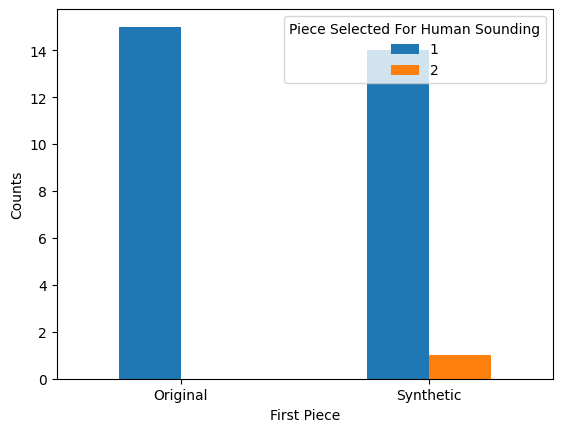

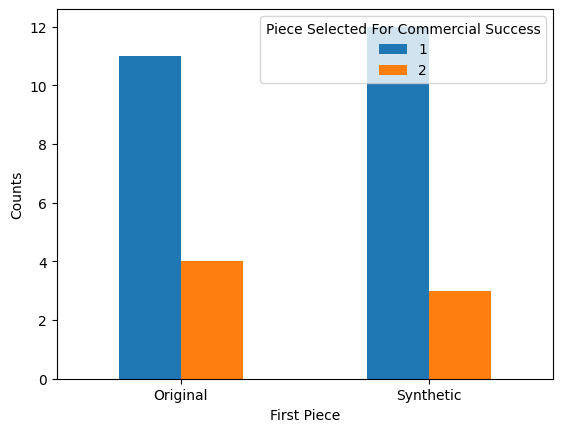

In [ ]:
def plot_counts(results, group_by_column, legend_title):
    # Group by 'First Piece' and the specified column, count occurrences
    counts = results.groupby(['First Piece', group_by_column]).size().unstack()

    # Plot
    ax = counts.plot(kind='bar', stacked=False)
    ax.set_xlabel('First Piece')
    ax.set_ylabel('Counts')
    plt.xticks(rotation=0)
    plt.legend(title=legend_title)
    plt.show()

# Plot for 'Human Sounding'
plot_counts(results, 'Human Sounding', 'Piece Selected For Human Sounding')

# Plot for 'Commercial Success'
plot_counts(results, 'Commercial Success', 'Piece Selected For Commercial Success')